# Webscraping
## Portal da Queixa
### Changes may be required due to Portal da Queixa's continous updates

(c) Nickolas Lago 2021 - Rev. 1.0

### Load packages and do the initializations

In [87]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import category_encoders as ce
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

### Importing the data from the provious webscraping

Delete the Unnamed: 0 column and make the complainID the index column of the DataFrame

In [88]:
df = pd.read_excel("complains_data.xlsx", index_col="complainID")

In [89]:
cols_to_drop = ["Unnamed: 0"]
df = df.drop(cols_to_drop, axis=1)

In [90]:
df.head()

,complainStatus,complainUser,complainTitle,complainViews,complainText,complainDate
complainID,,,,,,
59476521,Aguarda resposta,Susana,Lefties - Devolução de artigos,51,Recebi a minha encomenda no dia 19-04-2021 e i...,5 de maio 2021
58935721,Aguarda resposta,Cassia Barcelos,Lefties - Troca de peças compradas on-line,172,"Boa noite, _x000D_\nVenho mostrar o meu total ...",23 de abril 2021
58754421,Aguarda resposta,Milene,Lefties - Encomenda não entregue,59,A minha encomenda que fiz no dia 19 de Março n...,20 de abril 2021
58696921,Aguarda resposta,Mariana Ferreira,Lefties - Encomenda não entregue nem resolvem ...,38,Encomenda nr ‪90003989775‬ já deveria ter sido...,19 de abril 2021
58650521,Resolvida,Olga Santos,Lefties - Encomenda não entregue,121,Bom dia. Fiz uma encomenda online na Lefties n...,17 de abril 2021


## Working with Text

Cleaning and normalization of the raw text.

In [91]:
def textPreProcess(rawText, lowerText=True, charsToRemove=r'\_x000d_|\?|\.|\!|\;|\.|\"|\,|\(|\)|\&|\:|\-', removeNumbers=True, removeLineBreaks=True, removeStopWords=True):
    cleanedText = []
    for x in rawText[:]:
        procText = x
        if lowerText:
            procText = procText.lower()
        if len(charsToRemove)>0:
            procText = re.sub(charsToRemove,' ',procText)
        if removeNumbers:
            procText = re.sub(r'\d+',' ',procText)
        if removeLineBreaks:
            procText = procText.replace('\n',' ').replace('\r', '')
        if removeStopWords:
            stop_words = set(stopwords.words('portuguese'))
            tokenizedText = word_tokenize(procText, language='portuguese')
            cText = []
            for t in tokenizedText:
                if t not in stop_words:
                    cText.append(t)
            procText = ""
            for w in cText:
                procText = procText + w + ' '
            procText = procText.rstrip() # rstring (remove spaces at the right of the string)

        if procText != "":
            cleanedText.append(procText)
    return cleanedText

### Adding a column using the function to the original data frame with the text processing

In [92]:
df["processText"] = pd.DataFrame(data=textPreProcess(df.complainText), index=df.index)

In [93]:
df

,complainStatus,complainUser,complainTitle,complainViews,complainText,complainDate,processText
complainID,,,,,,,
59476521,Aguarda resposta,Susana,Lefties - Devolução de artigos,51,Recebi a minha encomenda no dia 19-04-2021 e i...,5 de maio 2021,recebi encomenda dia imediatamente dia seguir ...
58935721,Aguarda resposta,Cassia Barcelos,Lefties - Troca de peças compradas on-line,172,"Boa noite, _x000D_\nVenho mostrar o meu total ...",23 de abril 2021,boa noite venho mostrar total descontentamento...
58754421,Aguarda resposta,Milene,Lefties - Encomenda não entregue,59,A minha encomenda que fiz no dia 19 de Março n...,20 de abril 2021,encomenda fiz dia março entregue devido ctt ex...
58696921,Aguarda resposta,Mariana Ferreira,Lefties - Encomenda não entregue nem resolvem ...,38,Encomenda nr ‪90003989775‬ já deveria ter sido...,19 de abril 2021,encomenda nr ‪ ‬ deveria ter sido entregue sem...
58650521,Resolvida,Olga Santos,Lefties - Encomenda não entregue,121,Bom dia. Fiz uma encomenda online na Lefties n...,17 de abril 2021,bom dia fiz encomenda online lefties dia abril...
...,...,...,...,...,...,...,...
27355319,Sem resolução,izana pontes,Lefties - Racismo na loja,900,"No dia 11 de abril de 2018, fui a lefties do S...",12 de abril 2019,dia abril lefties strada odivelas parque desde...
24936119,Sem resolução,Cátia Oliveira,Lefties - Atitude de mau agrado,647,"A situação foi a seguinte, recebi uma peça de ...",5 de janeiro 2019,situação seguinte recebi peça roupa tamanho er...
24875119,Sem resolução,Mafalda Pereira,Lefties - Trocas,733,Ao efetuar uma troca de uma camisa de criança ...,3 de janeiro 2019,efetuar troca camisa criança indicado valor re...


## Other Processing Functions

In [94]:
# Tokenize texts
def tokenize_words(texts):
    words_new = []
    for w in (texts[:]):
        w_token = word_tokenize(w)
        if w_token != '':
            words_new.append(w_token)
    return words_new

In [95]:
# Stemm texts
def stemming(words):
    procText = []
    for w in (words[:]):
        stemmed_word = [snowball.stem(x) for x in (w[:])]
        procText.append(stemmed_word)
    return procText

In [96]:
# Function to count the frequency of n-grams (Adapted from https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34)
# Uses CountVectorizer from sklearn instead of FreqDist from NLTK
def get_top_n_words(corpus, n=None, nGrams=1): 
    vec = CountVectorizer(max_df=0.8, stop_words=stop_words,ngram_range=(nGrams,nGrams), max_features=10000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Analysis

In [112]:
df["tokenizedText"] = tokenize_words(df["processText"])

In [113]:
# Compute terms frequency distribution
from nltk.probability import FreqDist
fdist = FreqDist()
for review in df.tokenizedText:
  for term in review:
    fdist[term]+=1

In [114]:
# Transform results to a sorted dataframe
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)

### Term Frequency
What are the most common words in the dataset

In [115]:
# Top 15
df_fdist.head(15)

,Frequency
Term,
encomenda,333
dia,298
/,158
loja,143
lefties,122
cliente,104
fiz,90
recebi,88
artigos,79


In [116]:
# Low 15
df_fdist.tail(15)

,Frequency
Term,
incomodo,1
situaçao,1
emailcontact_pt,1
tecidos,1
recompensar,1
descosidos,1
possuiam,1
enviados,1
nr,1


## Word Cloud Analysis

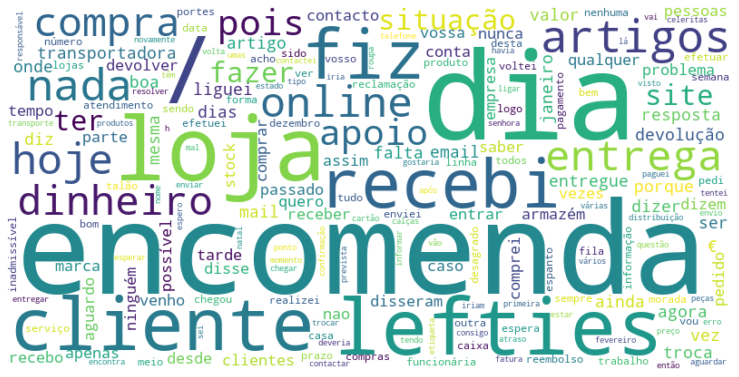

In [117]:
# Create a Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='white')
wordcloud.generate_from_frequencies(frequencies=df_fdist.Frequency)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Stemming the Data

In [118]:
# Create a stemmed version of the words to normalize the Lexicon
# Import package
from nltk.stem import SnowballStemmer

In [119]:
# Do stemming
snowball = SnowballStemmer("portuguese")
# Create a new column for stemm words
df['stemmedText'] = stemming(df['tokenizedText'])

In [120]:
# Calculate frequency distributions of the stemmed words
fdist = FreqDist()
for review in df.stemmedText:
  for term in review:
    fdist[term]+=1

# Create the sorted dataframe and sort it
df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
df_fdist.columns = ['Frequency']
df_fdist.index.name = 'Term'
df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)

(-0.5, 799.5, 399.5, -0.5)

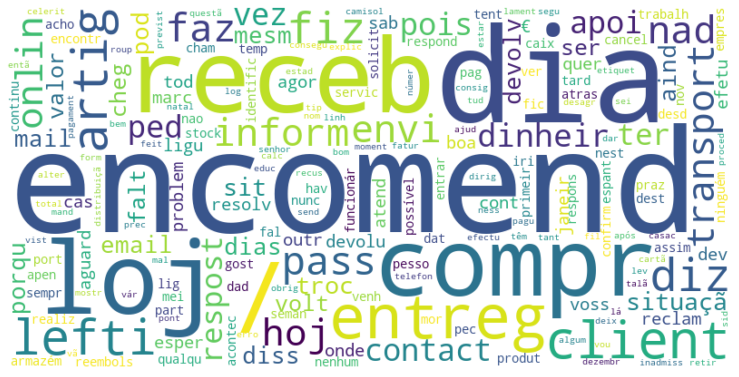

In [121]:
# Plot a new wordcloud with the stemmed words
wordcloud = WordCloud(width=800, height=400, background_color='white', contour_color='white')
wordcloud.generate_from_frequencies(frequencies=df_fdist.Frequency)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## N-Grams Analysis

### UNI-GRAMS

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

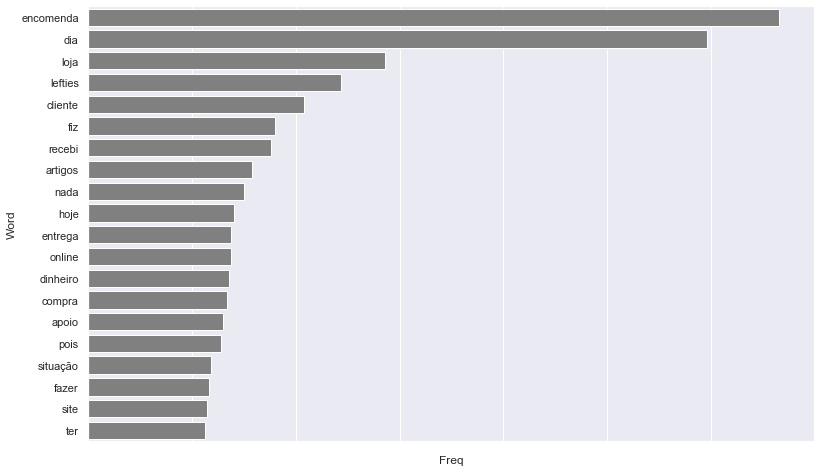

In [69]:
# PLOT top 20 most frequently occuring UNI-GRAMS
top_words = get_top_n_words(df['processComplains'], n=20, nGrams=1)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(data=top_df, x="Freq", y="Word", color="grey")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### BI-GRAMS

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

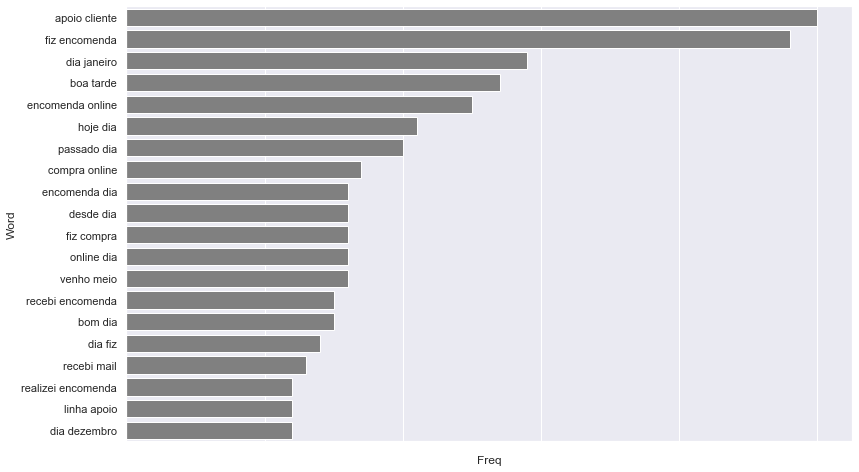

In [70]:
# PLOT top 20 most frequently occuring BI-GRAMS
top_words = get_top_n_words(df['processComplains'], n=20, nGrams=2)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(data=top_df, x="Freq", y="Word", color="grey")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### TRI-GRAMS

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

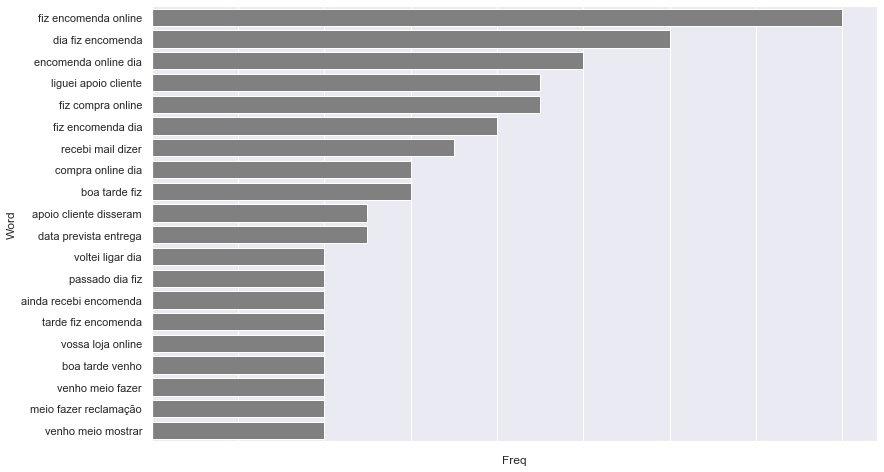

In [72]:
# PLOT top 20 most frequently occuring TRI-GRAMS
top_words = get_top_n_words(df['processComplains'], n=20, nGrams=3)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(data=top_df, x="Freq", y="Word", color="grey")
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### More visualization ideas at: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a